# An irrigation machine. Multiclass Classification

You're going to automate the watering of parcels by making an intelligent irrigation machine. Multi-label classification problems differ from multi-class problems in that each observation can be labeled with zero or more classes. So `classes are not mutually exclusive`.

To account for this behavior what we do is have an output layer with as many neurons as classes but this time, unlike in multi-class problems, each output neuron has a sigmoid activation function. This makes the output layer able to output a number between 0 and 1 in any of its neurons.

Keras Sequential() model and Dense() layers are preloaded. It's time to build an intelligent irrigation machine!

![irrigation.jpg](./data/irrigation.jpg)
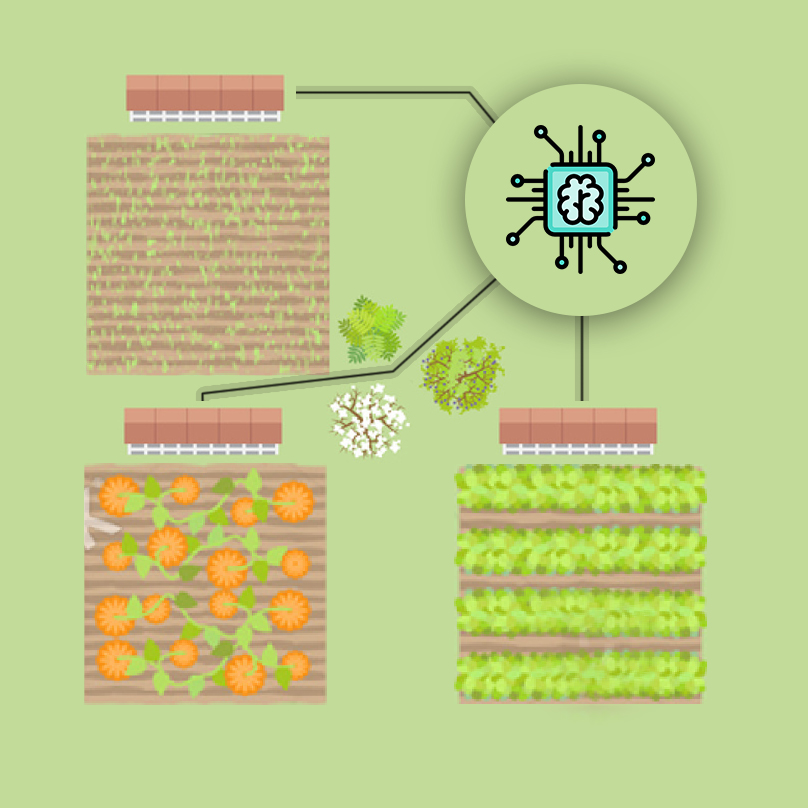

In [10]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# setting seaborn style 
sns.set_style('darkgrid')

In [4]:
# Load darts dataset
irrigation = pd.read_csv("data/irrigation_machine.csv")

irrigation.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [5]:
# splitting irrigation into Train and Test (80/20 stratify)

X = irrigation.iloc[:, 1:-3].values
y = irrigation.iloc[:, -3:].values

sensors_train, sensors_test, parcels_train, parcels_test \
                                = train_test_split(X, y, test_size=0.8, random_state=12345, stratify=y)

In [6]:
# Instantiate a Sequential model
model = Sequential()

In [7]:
# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add( Dense(64, input_shape=(20,), activation='relu'))

In [8]:
# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))

In [11]:
# Compile your model with adam and binary crossentropy loss
model.compile(optimizer='adam',
           loss= 'binary_crossentropy',
           metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1344      
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Train for 100 epochs using a validation split of 0.2
board = TensorBoard(log_dir='./logs')

hist = model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.2, verbose=0, callbacks=[board]);

In [15]:
# Preparing data for seaborn plots

new_hist = hist.history.copy()
new_hist.update({'epochs': [i for i in range(100)]})
df = pd.melt(pd.DataFrame(new_hist), id_vars='epochs')

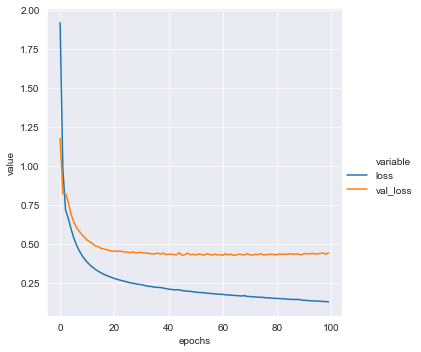

In [16]:
# Training ploting

mask = df.variable.isin(['loss', 'val_loss'])

sns.relplot(x='epochs', y='value', hue='variable',
             dashes=False, markers=True, kind="line", data=df[mask]);

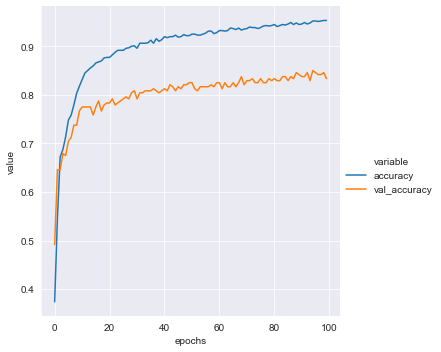

In [17]:
# Training ploting

mask = df.variable.isin(['accuracy', 'val_accuracy'])

sns.relplot(x='epochs', y='value', hue='variable',
             dashes=False, markers=True, kind="line", data=df[mask]);

In [18]:
# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

In [19]:
# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

Rounded Predictions: 
 [[1. 1. 0.]
 [0. 1. 0.]
 [1. 1. 1.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 1. 0.]]


In [20]:
# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test, verbose=0)[1]

In [21]:
# Print accuracy
print('Accuracy:', accuracy)

Accuracy: 0.8912501
